https://www.kaggle.com/datasets/alancmathew/anime-dataset/code

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("anime.csv")

In [4]:
df.isnull().sum()

title               0
mediaType          68
eps               359
duration         5441
ongoing             0
startYr           222
finishYr          444
sznOfRelease    10811
description      6405
studios             0
tags                0
contentWarn         0
watched           222
watching            0
wantWatch           0
dropped             0
rating           2471
votes            2459
dtype: int64

In [5]:
df.head()

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,2016.0,2016.0,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,2019.0,2019.0,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0


In [30]:
df_grouped = df.groupby("title")["rating"].mean()

In [31]:
df_grouped = df_grouped.to_frame().reset_index()

In [32]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   14578 non-null  object 
 1   rating  12107 non-null  float64
dtypes: float64(1), object(1)
memory usage: 227.9+ KB


In [33]:
df_grouped = df_grouped.dropna()

In [34]:
df_grouped.sort_values(by="rating",ascending=False , inplace= True) 


In [35]:
df_grouped.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12107 entries, 3659 to 12332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   12107 non-null  object 
 1   rating  12107 non-null  float64
dtypes: float64(1), object(1)
memory usage: 283.8+ KB


2000 farklı aneimeyi ratinglerine göre clustering yapacağım

rastgele 2000 tanesini  alıp ona göre clustering yapacağım

In [36]:
df_grouped = df_grouped.sample(2000)

In [37]:
data_cus1_dummy = pd.get_dummies(df_grouped , drop_first = True)

number of cluster 2, silhouette 0.2257398504713482
number of cluster 3, silhouette 0.12717591532563563
number of cluster 4, silhouette 0.07690665497182167
number of cluster 5, silhouette 0.05265190686660381
number of cluster 6, silhouette 0.03794213999648646
number of cluster 7, silhouette 0.02920048613076225
number of cluster 8, silhouette 0.022404303858666246
number of cluster 9, silhouette 0.01759989138870516
number of cluster 10, silhouette 0.014570045399951295


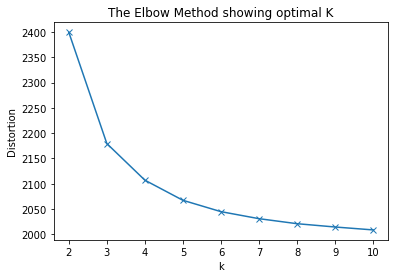

In [38]:

def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()
cluster(data_cus1_dummy,10)

In [42]:
model = KMeans(n_clusters = 5)

model = model.fit(data_cus1_dummy)

pred = model.predict(data_cus1_dummy)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\oztur\Desktop\AI Coruse\Day 5\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


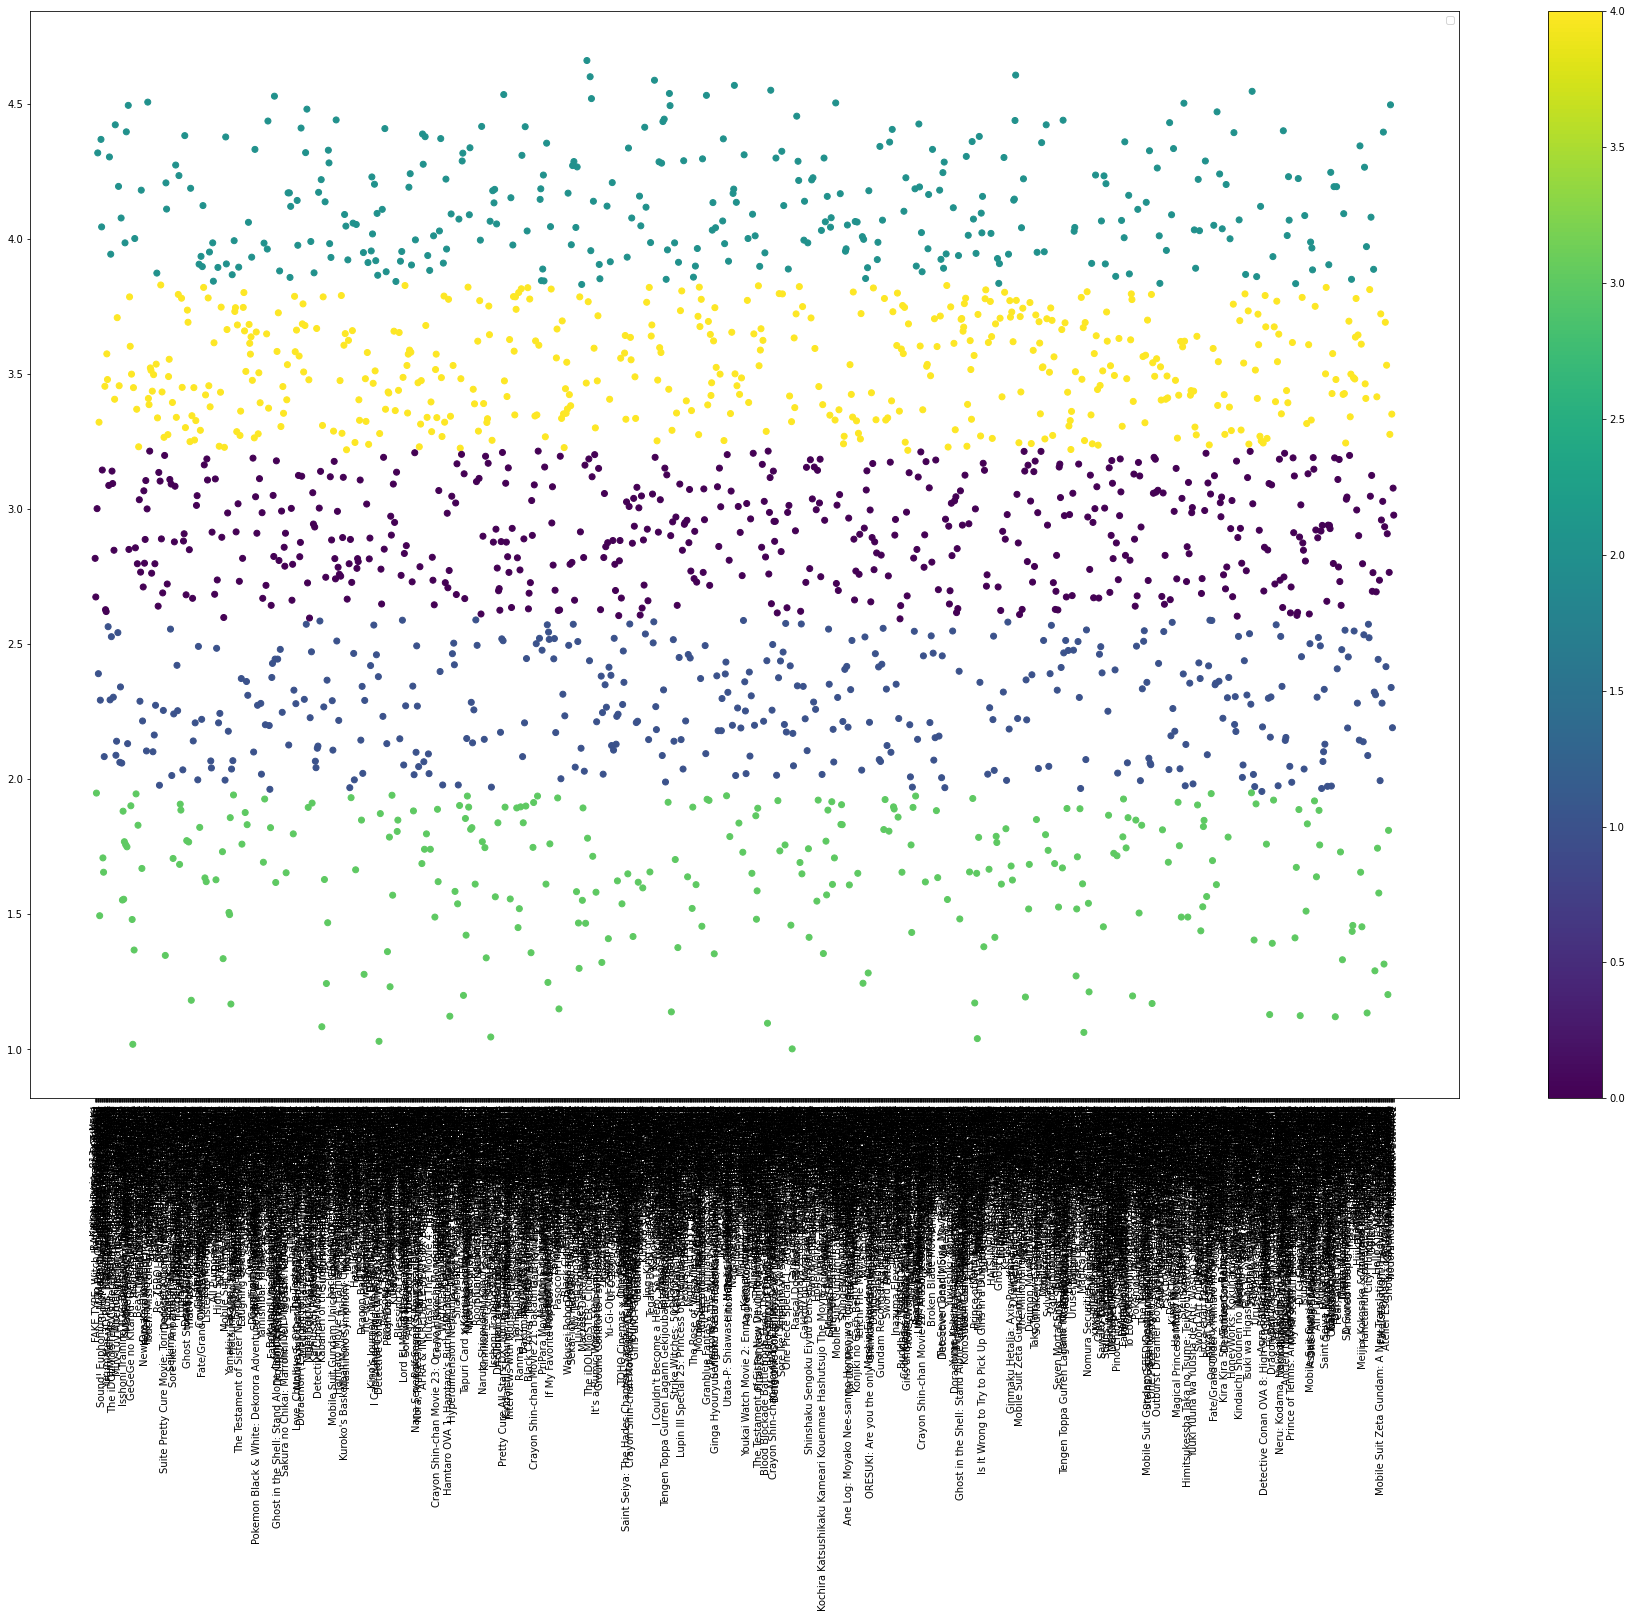

In [43]:
plt.figure(figsize = (32,20))  
plt.scatter(df_grouped["title"],df_grouped["rating"] , c = pred)
plt.legend()
plt.xticks(rotation = 90)
plt.colorbar()
plt.show() 